In [1]:
import pandas as pd
data = pd.read_excel("/content/CDR_6_MRIfull.xlsx")
data 

,SEX,INDEPEND,MEMORY,ORIENT,JUDGMENT,COMMUN,HOMEHOBB,PERSCARE,CDRGLOB,NPISCORE,...,RSUPFR,RSUPFRM,RSUPPAR,RSUPPARM,RSUPTEM,RSUPTEMM,RSUPMAR,RSUPMARM,RTRTEM,RTRTEMM
0,2,1,0,0,0,0,0,0,0,0,...,0.022229,0.002573,0.012313,0.001690,0.013390,0.002362,0.008422,0.001901,0.000727,0.001242
1,2,1,0,0,0,0,0,0,0,0,...,0.024551,0.002161,0.009114,0.001402,0.011982,0.001958,0.007428,0.001745,0.001002,0.001436
2,2,1,0,0,0,0,0,0,0,0,...,0.023044,0.002528,0.011245,0.001631,0.014259,0.002555,0.009018,0.001929,0.001011,0.001175
3,1,1,0,0,0,0,0,0,0,1,...,0.025236,0.001905,0.010176,0.001439,0.014644,0.001889,0.008720,0.001722,0.001107,0.001664
4,2,1,0,0,0,0,0,0,0,0,...,0.024523,0.001865,0.009781,0.001139,0.014733,0.001973,0.008312,0.001255,0.000858,0.001543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,2,1,0,0,0,0,0,0,0,2,...,0.025420,0.002925,0.011830,0.001772,0.012750,0.002526,0.009636,0.002026,0.001097,0.001902
1596,2,1,0,0,0,0,0,0,0,0,...,0.024433,0.002743,0.010769,0.001696,0.013166,0.002124,0.007746,0.002225,0.000581,0.001011
1597,1,2,2,2,2,2,2,2,2,7,...,0.028646,0.002051,0.010201,0.001462,0.012770,0.001882,0.010078,0.001834,0.000549,0.001365
1598,2,1,0,0,0,0,0,0,0,2,...,0.026394,0.002981,0.009892,0.001980,0.014052,0.002180,0.009527,0.002300,0.001162,0.001734


TASK-12A: Please use linear (PCA) and nonlinear (LLE, ISOMAP) dimensionality reduction methods using MR metrics to visualize the patients with their different CDRGLOB values/levels to understand whether there are visible patterns. Please first only use the first two dimensions in your visualizations.

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA

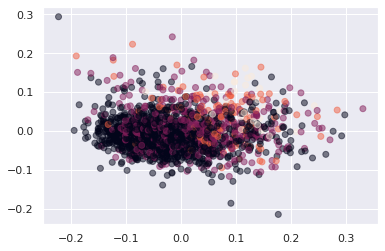

In [3]:
X = data.iloc[:,15:]
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(X)
plt.scatter(projected[:, 0], projected[:, 1], alpha=0.5, c=data["CDRGLOB"])

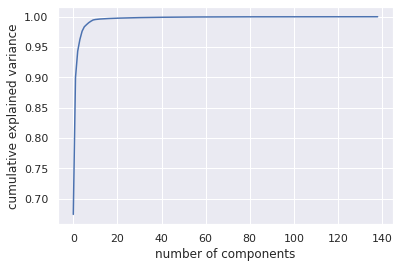

In [4]:
pca_all = PCA().fit(X)
plt.plot(np.cumsum(pca_all.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

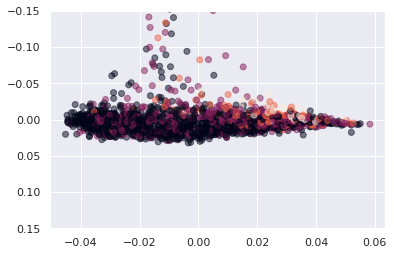

In [5]:
from sklearn.manifold import LocallyLinearEmbedding
model = LocallyLinearEmbedding(n_neighbors=100, n_components=2, method='modified',
                               eigen_solver='dense')
cdr_out = model.fit_transform(X)

fig, ax = plt.subplots()
ax.scatter(cdr_out[:, 0], cdr_out[:, 1],alpha=0.5, c=data["CDRGLOB"])
ax.set_ylim(0.15, -0.15);

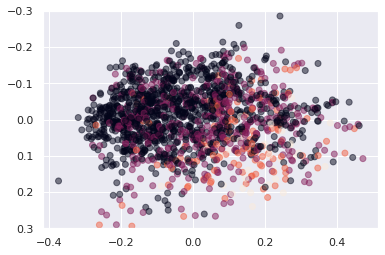

In [6]:
from sklearn.manifold import Isomap
model = Isomap(n_components=2)
proj = model.fit_transform(X)
fig, ax = plt.subplots()
ax.scatter(proj[:, 0], proj[:, 1],alpha=0.5, c=data["CDRGLOB"])
ax.set_ylim(0.3, -0.3);

TASK-12B: Please develop 3 separate predictive models with respect to the datasets with reduced dimensions (but use dimension/component number as 7) in part-A. Then use 3 different algorithms to provide classification models and compare the outputs of these 9 models. (train-test split = 0.75 and 0.25) 

3 algorithms are Gaussian Naive Bayes, SVM (rbf), and RandomForestClassifier

For this task, please use them with their default parameter values.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [8]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, data['CDRGLOB'], test_size=0.25, random_state=42)

In [9]:
gauss = GaussianNB()
gauss.fit(Xtrain, Ytrain)
Ypred = gauss.predict(Xtest)
print("Accuracy:",accuracy_score(Ytest, Ypred))

Accuracy: 0.57


In [10]:
svm = SVC()
svm.fit(Xtrain, Ytrain)
Ypred = svm.predict(Xtest)
print("Accuracy:",accuracy_score(Ytest, Ypred))

Accuracy: 0.635


In [11]:
randomforest = RandomForestClassifier()
randomforest.fit(Xtrain, Ytrain)
Ypred = randomforest.predict(Xtest)
print("Accuracy:",accuracy_score(Ytest, Ypred))

Accuracy: 0.6475


For PCA

GNB Accuracy for PCA: 0.6525
SVC Accuracy for PCA: 0.6625
 RFC Accuracy for PCA: 0.665


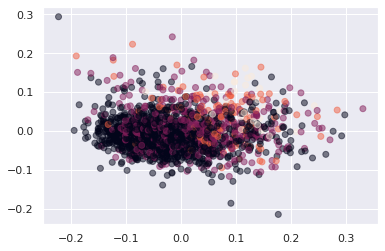

In [18]:
X = data.iloc[:,15:]
pca = PCA(n_components=7)
projected = pca.fit_transform(X)
plt.scatter(projected[:, 0], projected[:, 1], alpha=0.5, c=data["CDRGLOB"])

Xtrain, Xtest, Ytrain, Ytest = train_test_split(projected, data['CDRGLOB'], test_size=0.25, random_state=42)

gauss = GaussianNB()
gauss.fit(Xtrain, Ytrain)
Ypred = gauss.predict(Xtest)
print("GNB Accuracy for PCA:",accuracy_score(Ytest, Ypred))

svm = SVC()
svm.fit(Xtrain, Ytrain)
Ypred = svm.predict(Xtest)
print("SVC Accuracy for PCA:",accuracy_score(Ytest, Ypred))

randomforest = RandomForestClassifier()
randomforest.fit(Xtrain, Ytrain)
Ypred = randomforest.predict(Xtest)
print(" RFC Accuracy for PCA:",accuracy_score(Ytest, Ypred))

For ISOMAP

GNB Accuracy for ISOMAP: 0.61
SVC Accuracy for ISOMAP: 0.65
RFC Accuracy for ISOMAP: 0.635


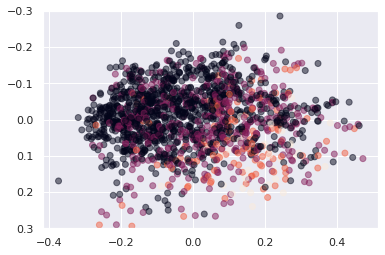

In [19]:
model = Isomap(n_components=7)
iso_projected = model.fit_transform(X)
fig, ax = plt.subplots()
ax.scatter(iso_projected[:, 0], iso_projected[:, 1],alpha=0.5, c=data["CDRGLOB"])
ax.set_ylim(0.3, -0.3);

Xtrain, Xtest, Ytrain, Ytest = train_test_split(iso_projected, data['CDRGLOB'], test_size=0.25, random_state=42)

gauss = GaussianNB()
gauss.fit(Xtrain, Ytrain)
Ypred = gauss.predict(Xtest)
print("GNB Accuracy for ISOMAP:",accuracy_score(Ytest, Ypred))

svm = SVC()
svm.fit(Xtrain, Ytrain)
Ypred = svm.predict(Xtest)
print("SVC Accuracy for ISOMAP:",accuracy_score(Ytest, Ypred))

randomforest = RandomForestClassifier()
randomforest.fit(Xtrain, Ytrain)
Ypred = randomforest.predict(Xtest)
print("RFC Accuracy for ISOMAP:",accuracy_score(Ytest, Ypred))

FOR LLE

GNB Accuracy for LLE: 0.63
SVC Accuracy for LLE: 0.655
RFC Accuracy for LLE: 0.62


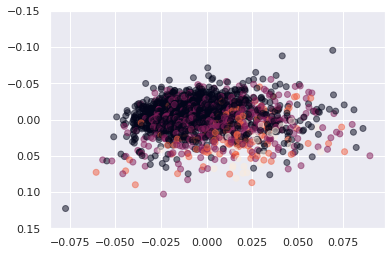

In [20]:
model = LocallyLinearEmbedding(n_neighbors=100, n_components=7, method='modified', eigen_solver='dense')
lle_projected = model.fit_transform(X)
fig, ax = plt.subplots()
ax.scatter(lle_projected[:, 0], lle_projected[:, 1],alpha=0.5, c=data["CDRGLOB"])
ax.set_ylim(0.15, -0.15);

Xtrain, Xtest, Ytrain, Ytest = train_test_split(lle_projected, data['CDRGLOB'], test_size=0.25, random_state=42)

gauss = GaussianNB()
gauss.fit(Xtrain, Ytrain)
Ypred = gauss.predict(Xtest)
print("GNB Accuracy for LLE:",accuracy_score(Ytest, Ypred))

svm = SVC()
svm.fit(Xtrain, Ytrain)
Ypred = svm.predict(Xtest)
print("SVC Accuracy for LLE:",accuracy_score(Ytest, Ypred))

randomforest = RandomForestClassifier()
randomforest.fit(Xtrain, Ytrain)
Ypred = randomforest.predict(Xtest)
print("RFC Accuracy for LLE:",accuracy_score(Ytest, Ypred))


TASK-12C: Please combine these four datasets (pca-iso-lle-tsne) and then use an algorithm of your interest separately on this dataset to predict the CDRGLOB values while using grid search to optimize the hyperparameters. Please use the first 5 components from each of these 4 datasets. Please do not forget to apply minmax scaling before the dimensionality reduction operations.

In [15]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

pca = PCA(n_components=5)
projected = pca.fit_transform(X)

iso = Isomap(n_components=5)
iso_projected = iso.fit_transform(X)

lle = LocallyLinearEmbedding(n_neighbors=100, n_components=5, method='modified', eigen_solver='dense')
lle_projected = lle.fit_transform(X)

tsne = TSNE(n_components=3)
tsne_projected= tsne.fit_transform(X)


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [16]:
X = np.concatenate((projected, iso_projected,lle_projected,tsne_projected), axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, data['CDRGLOB'], test_size=0.25, random_state=42)
svc = SVC()
svc.fit(Xtrain, Ytrain)
Ypred = svc.predict(Xtest)
print("Accuracy:",accuracy_score(Ytest, Ypred))


Accuracy: 0.655


TASK-12D: Please use the new dataset (selected) beginning with the 16th column after scaling it with minmax scaler. Then apply kmeans algorithm on the scaled dataset for k=4 and then visualize it with respect to their labels on 2 dimensions obtained via tSNE.

In [21]:
data_raw = pd.read_excel("CDR_6_MRI_selected.xlsx")
data_raw.head()

,SEX,INDEPEND,MEMORY,ORIENT,JUDGMENT,COMMUN,HOMEHOBB,PERSCARE,CDRGLOB,NPISCORE,...,RCUNM,RENT,RENTM,RINFTEMM,HIPPO_OCCORT,HIPPO_FR,HIPPO_PART,TEMPCOR_OCCO,TEMPCOR_PART,TEMPCOR_FR
0,2,1,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0.001607,0.004238,0.003373,0.003417,0.111574,0.043659,0.071193,1.845465,1.177555,0.722137
1,2,1,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0.001344,0.002923,0.003376,0.002431,0.126403,0.037998,0.070236,2.120735,1.178385,0.637517
2,2,1,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0.001482,0.003885,0.003288,0.003673,0.098596,0.039798,0.064722,1.943518,1.275791,0.784483
3,1,1,0.0,0.0,0.0,0.0,0.0,0,0,1,...,0.001215,0.003262,0.002945,0.002663,0.083988,0.031922,0.056775,1.877109,1.268896,0.713439
4,2,1,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0.001197,0.003599,0.002683,0.001890,0.119211,0.038113,0.075887,2.116505,1.347315,0.676674


In [22]:
dataa = data_raw.iloc[:,15:]
dataa.head()

,GRAYVOL,WMHVOL,HIPPOVOL,CERETISS,LATVENT,FRCORT,OCCCORT,PARCORT,TEMPCOR,LCUNM,...,RCUNM,RENT,RENTM,RINFTEMM,HIPPO_OCCORT,HIPPO_FR,HIPPO_PART,TEMPCOR_OCCO,TEMPCOR_PART,TEMPCOR_FR
0,0.538469,0.000522,0.006573,0.863848,0.012068,0.150552,0.058912,0.092326,0.108719,0.001518,...,0.001607,0.004238,0.003373,0.003417,0.111574,0.043659,0.071193,1.845465,1.177555,0.722137
1,0.548315,0.000457,0.006276,0.863232,0.010662,0.165166,0.049651,0.089356,0.105296,0.001289,...,0.001344,0.002923,0.003376,0.002431,0.126403,0.037998,0.070236,2.120735,1.178385,0.637517
2,0.552288,0.007150,0.006077,0.886453,0.010202,0.152706,0.061638,0.093899,0.119795,0.001303,...,0.001482,0.003885,0.003288,0.003673,0.098596,0.039798,0.064722,1.943518,1.275791,0.784483
3,0.585542,0.000000,0.005425,0.863620,0.007963,0.169945,0.064592,0.095552,0.121245,0.001231,...,0.001215,0.003262,0.002945,0.002663,0.083988,0.031922,0.056775,1.877109,1.268896,0.713439
4,0.540040,0.000074,0.006182,0.867648,0.006463,0.162207,0.051860,0.081467,0.109761,0.001065,...,0.001197,0.003599,0.002683,0.001890,0.119211,0.038113,0.075887,2.116505,1.347315,0.676674


In [23]:
from sklearn.preprocessing import MinMaxScaler
mm_scaler=MinMaxScaler()
data_scaled=mm_scaler.fit_transform(dataa)
data_scaled

array([[0.34466296, 0.00276713, 0.70394774, ..., 0.38126392, 0.35275158,
        0.40716566],
       [0.38518066, 0.00241988, 0.64284949, ..., 0.57145031, 0.35370065,
        0.26270722],
       [0.40152897, 0.03786587, 0.60198398, ..., 0.44900941, 0.46514979,
        0.51360024],
       ...,
       [0.57348624, 0.08992182, 0.57822605, ..., 0.62295476, 0.48810442,
        0.32662128],
       [0.61830927, 0.13984642, 0.67399771, ..., 0.55820967, 0.36333314,
        0.25037979],
       [0.5993941 , 0.05787578, 0.70584069, ..., 0.65944561, 0.52735209,
        0.29157177]])

In [28]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit_predict(data_scaled)
labels = np.zeros_like(clusters)

tsne = TSNE(n_components=2)
fitted_data = tsne.fit_transform(data_scaled)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


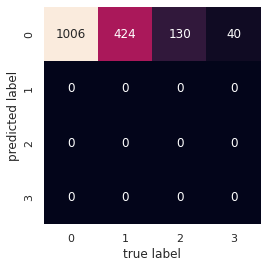

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(data_raw["CDRGLOB"], labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

TASK-12E: Please use the silhouette algorithm to find the optimal number of clusters (k=2, 3, 4, …. 50). Please visualize the silhouette scores within this range and decide the most appropriate cluster number. Then apply the suitable cluster number using K-means. 

In [30]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [31]:
list_SS = []
for no_clusters in range(2,51):

    clusterer = KMeans(n_clusters=no_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(data_scaled)


    silhouette_avg = silhouette_score(data_scaled, cluster_labels)
    list_SS.append(silhouette_avg)

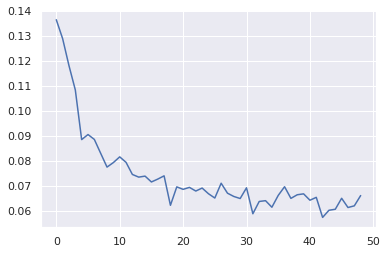

In [33]:
plt.plot(list_SS)

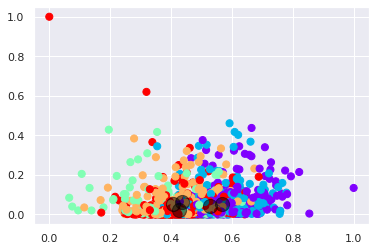

In [34]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(data_scaled)
y_kmeans = kmeans.predict(data_scaled)
    
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=y_kmeans, s=50, cmap='rainbow')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.show()

In [35]:
clusterer = KMeans(n_clusters=12, random_state=10)
cluster_labels_12 = clusterer.fit_predict(data_scaled)

In [36]:
data_raw.pivot_table( "HIPPOVOL", index=cluster_labels_12, columns=data_raw["CDRGLOB"])

CDRGLOB,0,1,2,3
0,0.005557,0.005380,0.005373,0.004901
1,0.006223,0.006122,0.005864,0.006596
2,0.006851,0.006753,0.006928,0.006023
3,0.006143,0.005970,0.005836,0.005594
4,0.006549,0.006488,0.006012,NaN
5,0.006647,0.006626,0.006465,0.007127
6,0.005269,0.004856,0.004526,0.004529
7,0.006457,0.006352,0.006178,NaN
8,0.005902,0.005839,0.005649,0.005929
9,0.006138,0.006287,0.006080,NaN


In [37]:
data_raw.pivot_table( "HIPPOVOL", index=cluster_labels_12, columns=data_raw["CDRGLOB"], aggfunc = "count")

CDRGLOB,0,1,2,3
0,60.0,50.0,22.0,7.0
1,134.0,39.0,7.0,2.0
2,80.0,33.0,3.0,1.0
3,125.0,36.0,10.0,4.0
4,20.0,11.0,3.0,NaN
5,106.0,36.0,2.0,2.0
6,8.0,27.0,31.0,11.0
7,100.0,44.0,3.0,NaN
8,162.0,42.0,4.0,2.0
9,57.0,27.0,6.0,NaN


TASK-12F: Please use the final dataset but this time add the following columns <br>SEX
<br>INDEPEND
<br>NPISCORE
<br>FAQ


In [40]:
data_new=data_raw[["SEX", "INDEPEND", "FAQ", "NPISCORE"]]

In [43]:
dataa = data_raw.iloc[:,15:]
X = np.concatenate((dataa, data_new), axis = 1)
data_framed = pd.DataFrame(X)


In [44]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(data_framed, data['CDRGLOB'], test_size=0.25, random_state=42)
svc = SVC()
svc.fit(Xtrain, Ytrain)
Ypred = svc.predict(Xtest)
print("Accuracy:",accuracy_score(Ytest, Ypred))

Accuracy: 0.8325


TASK-12G: Then for comparison purposes, use only these four columns to develop a model):
<br>SEX
<br>INDEPEND
<br>NPISCORE
<br>FAQ


In [64]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(data_new, data['CDRGLOB'], test_size=0.25, random_state=42)
svc = SVC()
svc.fit(Xtrain, Ytrain)
Ypred = svc.predict(Xtest)
print("Accuracy:",accuracy_score(Ytest, Ypred))
#If we use the same prediction model, the output remains same. 

Accuracy: 0.8325


In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [68]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(data_new, data['CDRGLOB'], test_size=0.25, random_state=42)

param_grid = [{'n_estimators' : [50,70,100,150], 
               'max_depth': [5, 10],
               'min_samples_split' : [2,3] 
               }]
     
grid = GridSearchCV(RandomForestClassifier(), param_grid, refit=True)
grid.fit(Xtrain, Ytrain)
grid.best_params_
predictions = grid.predict(Xtest)

print(accuracy_score(Ytest, predictions))
     

0.845
